# HW #2: Neural Networks

[change this (hw #1)]
This experiment uses a neural network of ten Networks encapsulated in a Network class object.
The Networks themselves exist in a weight matrix property of the Network class that is returned
as a Numpy array from the train() method.  There are two layers in this network.
An input layer represented as xᴷ of 784 inputs, plus one for the bias.  And an output layer
represented as yᴷ. There are no hidden layers in this experiment.  We ran the experiment with learning
rates, represented as η, of 0.00001, 0.001, and 0.1.

     xᴷ      The input layer vector of 784 (+1 bias) pixels of a single image
     yᴷ      The output (activation) layer vector of 10 nodes representing activation level of a digit
     tᴷ      The output layer vector of 10 nodes from the labeled training data
     wᵢ      The weight element at index i of 785 weights
     Δwᵢ     The gradient or vector derivative in order to minimize the cost function

The Network Learning Algorithm was implemented by forwarding an activation vector of 10 elements
to the output layer in the forward() method.


      yᴷ = a(w · x)

After forwarding the activation layer, we updated weights through back propagation using
the following formula in the back() method:

     Δwᵢ = η(tᴷ - yᴷ)xᵢᴷ
      wᵢ ⟵ wᵢ + Δwᵢ


## Experiment 1

In [1]:
import network as nn

## Static Parameters
Here are the parameters that actually will remain static for all of our experiments.
In fact, aside from the filenames for the training and validation samples, they are the
the default parameter values for training.

In [2]:
# train_file = 'mnist_train.csv'
# test_file = 'mnist_validation.csv'
# epochs = 50

train_file = 'mnist_train_6k.csv'
test_file = 'mnist_validation_1k.csv'
epochs = 10

bias = 1
rate = 0.1
target = 0.9
initial_weight = 0.05

## Parameters
Here are the the parameters that will actually change during the experiments:

In [3]:
input_size = 785
hidden_size = 20
output_size = 10
sizes = [input_size, hidden_size, output_size]

momentum = 0.9

Missing from the code above, is the size of the training samples. We will show that later.

### Hidden Input Size
This is number of nodes in the hidden layer.  Conceptually, this represents the number of
intermediate things (or abstractions) that this network will learn about hand written digits.
We could have more than one hidden layer, but we don't do that in any of these experiments.

### Momentum α ###
In plain English, momentum in machine learning helps you from getting stuck in a local minima,
instead of reaching the global minima (OK, maybe that wasn't that plain of English). I really
like this photo I found in an answer on Quora:
https://www.quora.com/What-does-momentum-mean-in-neural-networks

In this case, a picture truly is a thousand words.

<img style="border: 1px solid"  width="35%" height="35%" src="https://qph.fs.quoracdn.net/main-qimg-834da2a61df256c91ba57827da985638">

### Training Size
Experiment 3 involves varying the number of training samples. I simply do this by slicing off a 1/2 of
the samples, and then another 1/4 of them.  More on that below.

## Initializing our Neural Network
First we instantiate our neural network.  The constructor optionally takes in the training and testing filenames
and the bias.  The default for the bias is 1.  Since I have never really seen the bias ever change, I
decided to keep this parameter at the constructor level during initialization. However, I have moved
several parameters from the constructor to the train method, because one might want to vary these
parameters during several trainings.

I do require a that you specify the number and size of each layer durning initialization. However, I do
allow you to resize these layers by providing a resize function.

Below demonstrates initializing our neural network.

In [4]:
input_size = 784 + bias
hidden_size = 20
output_size = 10
sizes = [input_size, hidden_size, output_size]

n = nn.Network(sizes=sizes, train_filename=train_file, test_filename=test_file, bias=bias)

Loading Data: mnist_train_6k.csv
Loading Data: mnist_validation_1k.csv


# Experiment 1: Hidden Layer Size
Blah blah blah blah
### Train with a hidden layer size of 20 nodes
For clarity, I demonstrate how to resize the hidden layer, although it was already set to
20 during initialization.

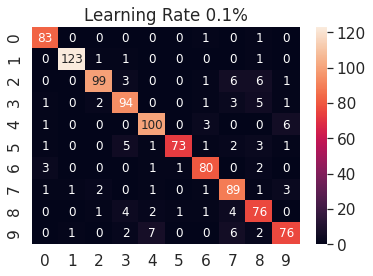

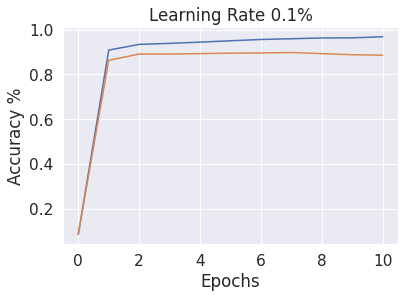

Accuracy: 89.3%


In [5]:
n.resize([input_size, 20, output_size])

wᵢ, wⱼ, accuracy = n.train(η=rate, α=momentum, target=target, epochs=epochs, initial_weight=initial_weight)

assert(wᵢ.shape == (784 + bias, 20))
assert(wⱼ.shape == (20 + bias, 10))
assert(accuracy > .80)
#assert(accuracy > .90)

print(f"Accuracy: {accuracy:.1%}")

Notice how the train method returns three objects:

- wᵢ: Weight matrix from the input layer to the hidden layer.
- wⱼ: Weight matrix from the hidden layer to the output layer
- accuracy: How accurate our model is

Why do I return the weights as shown above? Because this is our model! I am assuming after training,
this model will be packaged up some how and used in production to recognize images (I hope to do
this with the one I created).

One interesting thing I learned while debugging, is that the layers themselves are disposable.
You throw them basically away after each sample you train on.  It is the weights that persist and
need to be trained. These connections are the neural networks. For some reason, I imagined the
result of my neural network would include the layers themselves.

### Train with a hidden layer size of 50 nodes
Instead of having to create a new Neural Network object and reloading the training and testing data, we
can simply use the same object and call a resize method that I added. We use it here to resize the
hidden layer to 50 nodes.

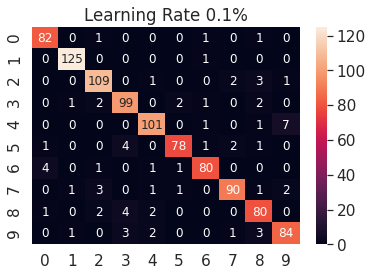

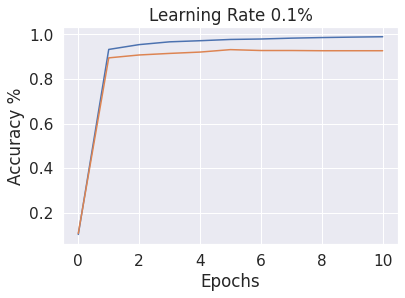

Accuracy: 92.8%


In [6]:
n.resize([input_size, 50, output_size])

wᵢ, wⱼ, accuracy = n.train(epochs=epochs)

assert(wᵢ.shape == (784 + bias, 50))
assert(wⱼ.shape == (50 + bias, 10))
assert(accuracy > .80)
#assert(accuracy > .90)

print(f"Accuracy: {accuracy:.1%}")

Note that removed most of the parameters to the train() method.
In this experiment, we are just varying the hidden layer size.  All of the
other parameters are set to the defaults.  I pass in epochs, because for testing purposes,
you may want to limit that.

### Train with a hidden layer size of 100 nodes
And the last part of experiment 1 is increasing our hidden layer to 100 nodes.

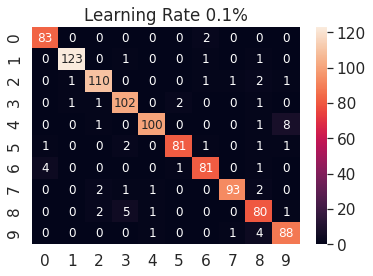

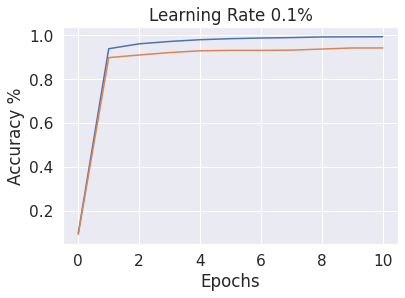

Accuracy: 94.1%


In [7]:
n.resize([input_size, 100, output_size])

wᵢ, wⱼ, accuracy = n.train(epochs=epochs)

assert(wᵢ.shape == (784 + bias, 100))
assert(wⱼ.shape == (100 + bias, 10))
assert(accuracy > .80)
#assert(accuracy > .90)

print(f"Accuracy: {accuracy:.1%}")

# Experiment 3: Momentum
Blah blah blah blah
### Train with a momentum of .25
For clarity, I demonstrate how to resize the hidden layer, although it was already set to
20 during initialization.

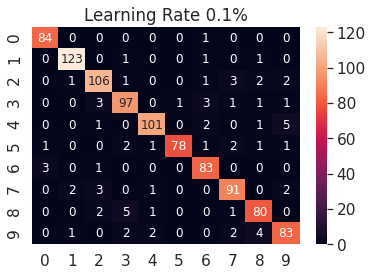

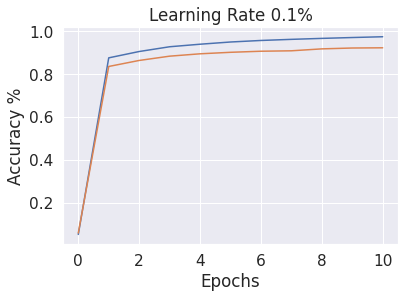

Accuracy: 92.6%


In [8]:
momentum = 0.25

wᵢ, wⱼ, accuracy = n.train(α=momentum, epochs=epochs)

assert(accuracy > .80)
#assert(accuracy > .90)
print(f"Accuracy: {accuracy:.1%}")

### Train with a momentum of .5
For clarity, I demonstrate how to resize the hidden layer, although it was already set to
20 during initialization.

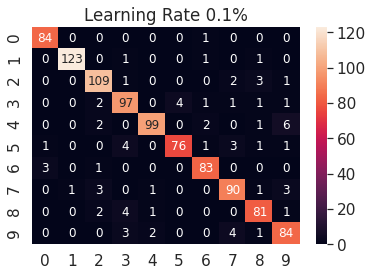

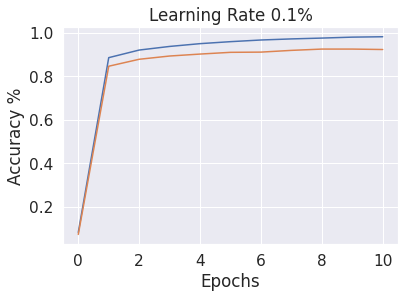

Accuracy: 92.6%


In [9]:
momentum = 0.5

wᵢ, wⱼ, accuracy = n.train(α=momentum, epochs=epochs)

assert(accuracy > .80)
#assert(accuracy > .90)
print(f"Accuracy: {accuracy:.1%}")

### Train with a momentum of .95
For clarity, I demonstrate how to resize the hidden layer, although it was already set to
20 during initialization.

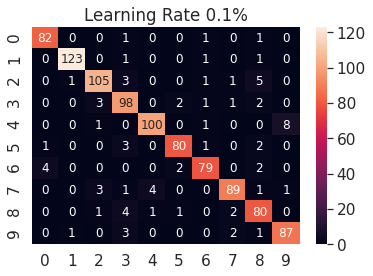

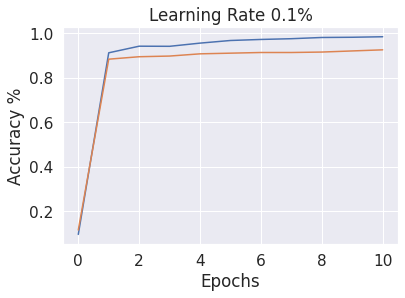

Accuracy: 92.3%


In [10]:
momentum = 0.95

wᵢ, wⱼ, accuracy = n.train(α=momentum, epochs=epochs)

assert(accuracy > .80)
#assert(accuracy > .90)
print(f"Accuracy: {accuracy:.1%}")

# Experiment 2: Training Data Size
Blah blah blah blah
### Train with half the training data (30K samples)
For clarity, I demonstrate how to resize the hidden layer, although it was already set to
20 during initialization.

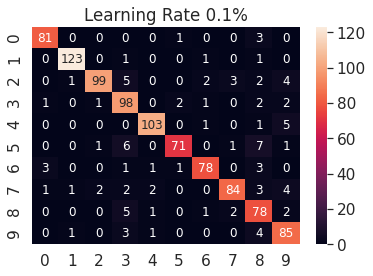

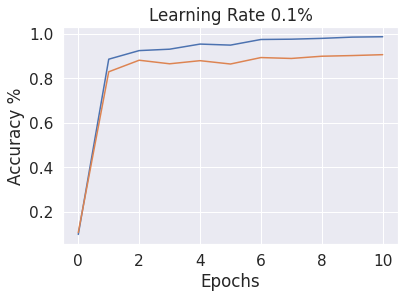

Accuracy: 90.0%


In [11]:
total_training_samples = len(n.train_labels)
training_size = 0.50
samples = int(total_training_samples * training_size)

n.train_labels = n.train_labels[:samples]
n.train_data = n.train_data[:samples]

wᵢ, wⱼ, accuracy = n.train(α=momentum, epochs=epochs)

assert(accuracy > .80)
#assert(accuracy > .90)
print(f"Accuracy: {accuracy:.1%}")

### Train with a quarter of the training data (15K samples)
For clarity, I demonstrate how to resize the hidden layer, although it was already set to
20 during initialization.

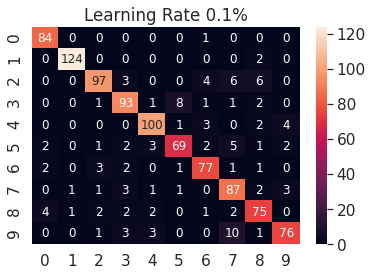

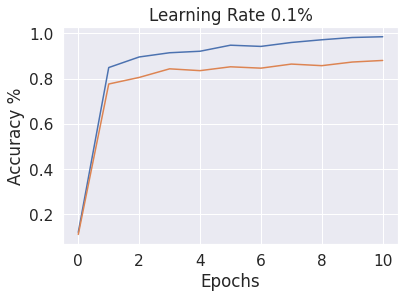

Accuracy: 88.2%


In [12]:
training_size = 0.25
samples = int(total_training_samples * training_size)

n.train_labels = n.train_labels[:samples]
n.train_data = n.train_data[:samples]

wᵢ, wⱼ, accuracy = n.train(α=momentum, epochs=epochs)

assert(accuracy > .80)
#assert(accuracy > .90)
print(f"Accuracy: {accuracy:.1%}")

## Summary
The digits having the most issues being classified were 8, 5, and 2, all being mistaken for a 3.
The rest of the digits did quite well, especially 0, 1, 5, and 7.  That plots and confusions
matrices do not show any significant differrences between our three learning rates.

I noticed with all them that starting with the Epoch 0 the accuracy was very low (as expected).
It was less than 10%.  At Epoch 1, the accuracy jumps to ~85% and then over the next 49 epochs
we only get an improvement of 3%.  I am confused by this.  Also, I don't see any oscillations
here, so it appears that I am overfitting.